In [52]:
install.packages("dplyr", repos="http://cran.rstudio.com/") 
install.packages("RSQLite", repos="http://cran.rstudio.com/") 
install.packages("sqldf", repos="http://cran.rstudio.com/") 
install.packages("qplot", repos="http://cran.rstudio.com/") 
install.packages("ggplot2", repos="http://cran.rstudio.com/") 


Installing package into 'C:/Users/tsankhe/Documents/R/win-library/3.3'
(as 'lib' is unspecified)
Warning message:
"package 'dplyr' is in use and will not be installed"Installing package into 'C:/Users/tsankhe/Documents/R/win-library/3.3'
(as 'lib' is unspecified)
Warning message:
"package 'RSQLite' is in use and will not be installed"Installing package into 'C:/Users/tsankhe/Documents/R/win-library/3.3'
(as 'lib' is unspecified)
Warning message:
"package 'sqldf' is in use and will not be installed"Installing package into 'C:/Users/tsankhe/Documents/R/win-library/3.3'
(as 'lib' is unspecified)
Warning message:
"package 'qplot' is not available (for R version 3.3.2)"Installing package into 'C:/Users/tsankhe/Documents/R/win-library/3.3'
(as 'lib' is unspecified)


package 'ggplot2' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\tsankhe\AppData\Local\Temp\RtmpGCVfPN\downloaded_packages


In [53]:
library(dplyr)
library(sqldf)
library(ggplot2)


Warning message:
"package 'ggplot2' was built under R version 3.3.3"

ERROR: Error in library(qplot): there is no package called 'qplot'


In [3]:
pewdata<-read.csv("pewData.csv")
pewdata<-rename(pewdata,id=ï..psraid)

In [4]:
names(pewdata)

[1] "id"         "sample"     "int_date"   "lang"       "usr"       
  [6] "cregion"    "state"      "form"       "sex"        "q1"        
 [11] "q3"         "eminuse"    "intmob"     "intfreq"    "home4nw"   
 [16] "bbhome1"    "bbhome2"    "bbhome3a"   "bbhome3b"   "bbhome3c"  
 [21] "bbhome3d"   "bbhome3e"   "device1a"   "smart1"     "q4"        
 [26] "bbsmart1"   "bbsmart2"   "bbsmart3a"  "bbsmart3b"  "bbsmart3c" 
 [31] "bbsmart3d"  "bbsmart3e"  "bbsmart3f"  "bbsmart4"   "cable1"    
 [36] "cable2"     "cable3a"    "cable3b"    "cable3c"    "act19"     
 [41] "act87a"     "act87b"     "act137"     "q5a"        "q5b"       
 [46] "q5c"        "q5d"        "q5e"        "q5f"        "date1a"    
 [51] "date2a"     "date3a"     "date3b"     "date4a"     "date4b"    
 [56] "date4c"     "date4d"     "date4e"     "date4f"     "game1"     
 [61] "game2a"     "game2b"     "game2c"     "game2d"     "game2e"    
 [66] "game2f"     "game3a"     "game3b"     "game4"      "emplnw"    
 [71] "emptype1"   "emptype2"   "emptype3"   "stud"       "job1a"     
 [76] "job1b"      "job1c"      "job1d"      "job1e"      "job1f"     
 [81] "job2"       "job3a"      "job3b"      "job3c"      "job3d"     
 [86] "job3e"      "job3f"      "job3g"      "job3h"      "job4"      
 [91] "smjob1"     "smjob2a"    "smjob2b"    "smjob2c"    "smjob2d"   
 [96] "smjob2e"    "smjob3"     "smjob4a"    "smjob4b"    "smjob4c"   
[101] "smjob4d"    "smjob4e"    "snsjob1a"   "snsjob1b"   "snsjob1c"  
[106] "snsjob2a"   "snsjob2b"   "job5a"      "job5b"      "job5c"     
[111] "job5d"      "auto1a"     "auto1b"     "auto1c"     "auto1d"    
[116] "auto1e"     "auto2"      "auto3"      "age"        "marital"   
[121] "hh1"        "par"        "kidage1"    "kidage2"    "kidage3"   
[126] "educ2"      "edinst"     "disa"       "party"      "partyln"   
[131] "ideo"       "hisp"       "birth_hisp" "race"       "inc"       
[136] "ql1a"       "qc1"        "zipcode"    "weight"     "standwt"

## 1. Reasons for not having broadband by age

In [160]:
broadband<- pewdata[,c('id','bbsmart3a','age')]
smart<- pewdata[,c('id','bbsmart3c','age')]

str(broadband)

'data.frame':	2001 obs. of  3 variables:
 $ id       : int  100006 100009 100011 100039 100040 100043 100049 100051 100058 100059 ...
 $ bbsmart3a: int  NA 8 2 NA NA NA 2 2 NA 2 ...
 $ age      : int  47 63 86 40 65 69 72 70 77 73 ...


In [161]:
broadband$bbsmart3a[broadband$bbsmart3a!=1]<-NA
smart$bbsmart3c[smart$bbsmart3c!=1]<-NA


In [162]:
bb<-group_by(broadband,age) %>% filter(bbsmart3a==1) %>% tally()
sp<-group_by(smart,age) %>% filter(bbsmart3c==1) %>% tally()

In [163]:
broadSmart<-merge(x=bb, y=sp, by.x="age", by.y="age")
broadSmart<-rename(broadSmart, expensive=n.x, smartphone=n.y)
head(broadSmart)

age,expensive,smartphone
18,4,4
19,3,4
20,6,3
21,1,2
22,9,5
23,2,4


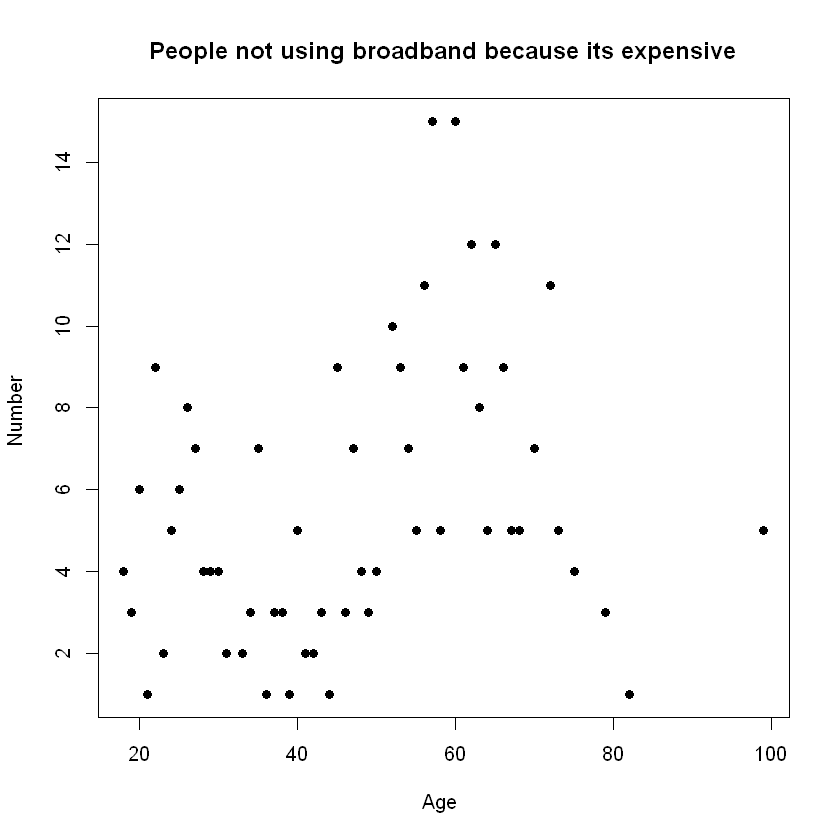

In [193]:

plot(broadSmart$age, broadSmart$expensive, main="People not using broadband because its expensive",
xlab="Age ", ylab="Number ", pch=19)

## 2. Gamers opinion of most games 

In [17]:
game<-pewdata[pewdata$game1==1,c('game2a', 'game2b' ,'game2c', 'game2d', 'game2f')]

,game2a,game2b,game2c,game2d,game2f
2,1,3,3,3,3
5,3,8,3,3,2
12,3,8,8,2,3
13,1,2,3,2,3
14,1,3,3,3,2
15,2,1,2,3,3


In [174]:
game$game2a[game$game2a>4]<-NA
game$game2b[game$game2b>4]<-NA
game$game2c[game$game2c>4]<-NA
game$game2d[game$game2d>4]<-NA
game$game2f[game$game2f>4]<-NA

In [215]:
gamebeahv<- sqldf("select game2a,COUNT(game2a),COUNT(game2b)  ,COUNT(game2c) , COUNT(game2d) ,COUNT(game2f) from game group by game2a ")
##gamebeahv<-gamebeahv[!is.na(gamebeahv$game2a),]

(gamebeahv)

game2a,COUNT(game2a),COUNT(game2b),COUNT(game2c),COUNT(game2d),COUNT(game2f)
NA,0,53,29,42,48
1,220,197,189,196,199
2,515,485,392,446,434
3,108,97,79,89,101


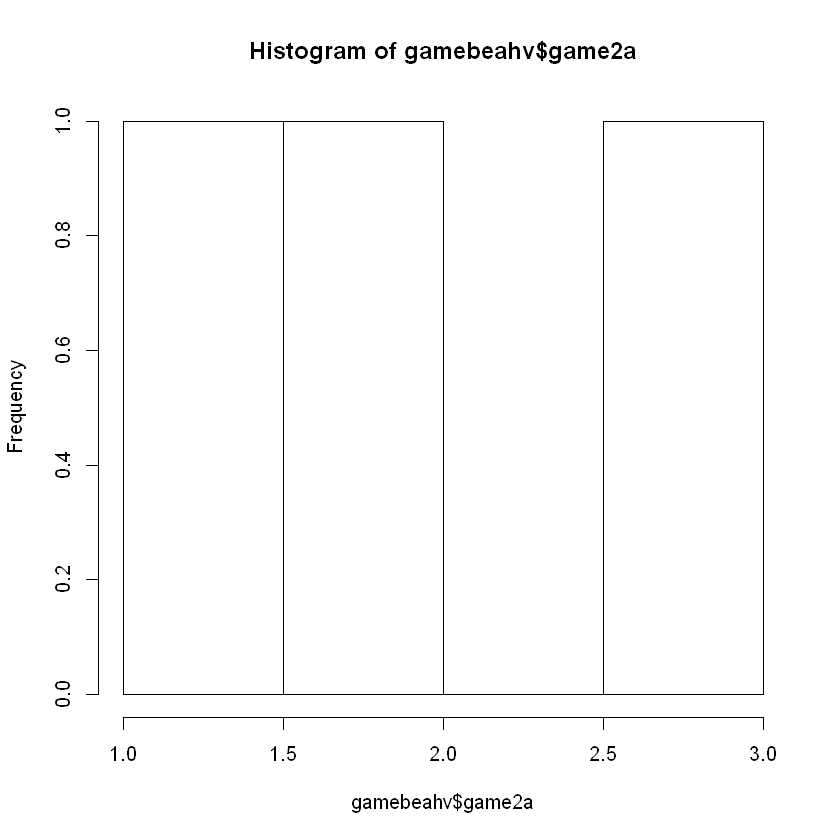

In [216]:
hist(gamebeahv$game2a)

## 3. What type of employees think going online to find a list of available jobs in their area is easy

In [82]:
jobs<-pewdata[,c('emptype3','job1c')]

In [83]:
jobstats<- group_by(jobs, emptype3) %>% filter(emptype3 <=5, job1c<=4) %>% select(emptype3) %>%  tally()

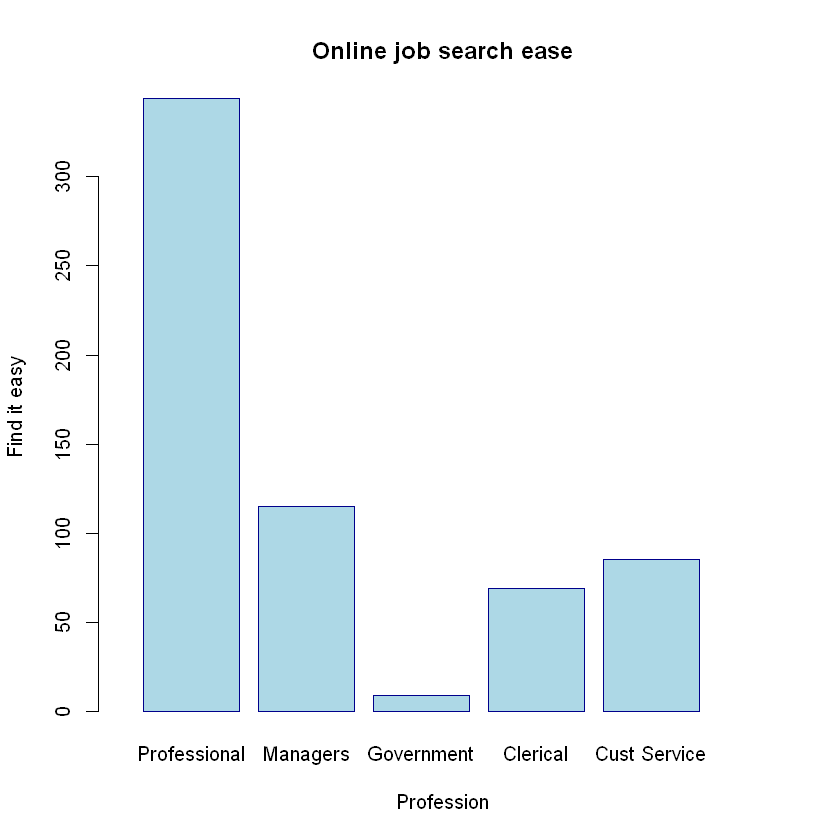

In [107]:
barplot(jobstats$n,names.arg=c('Professional','Managers','Government','Clerical','Cust Service'),xlab = "Profession",ylab = "Find it easy",col = "lightblue",
main = "Online job search ease",border = "darkblue" , width=15, xlim=c(0,100))

## 4. Male vs female that think online dating dangerous

In [118]:
dating<-pewdata[pewdata$date1a==1,c('sex','date1a','date4f')]

In [120]:
dating$date4f[dating$date4f>2]<-NA
datestats<-group_by(dating, date4f,sex) %>% tally()
datestats[is.na(datestats$date4f), ]<-NA
datestats<-na.omit(datestats)

In [121]:
datestats

date4f,sex,n
1,1,44
1,2,51
2,1,70
2,2,47


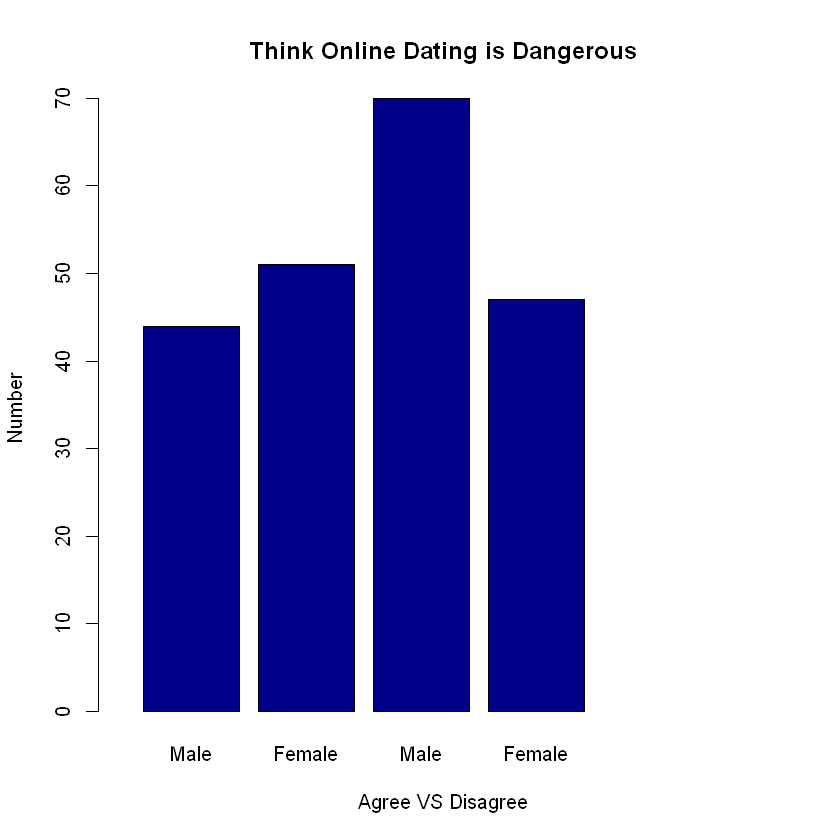

In [133]:
barplot(datestats$n,names.arg=c('Male', 'Female','Male', 'Female'),xlab = "Agree VS Disagree",ylab = "Number",col = "darkblue",
main = "Think Online Dating is Dangerous" , width=15, xlim=c(0,100))

## 5. Social media helped or lose job for Students vs employed 

In [194]:
social1<- pewdata[pewdata$snsjob2a==1, c('snsjob2a','emplnw')]
social2<- pewdata[pewdata$snsjob2b==1, c('snsjob2b','emplnw')]

In [195]:
s1<- group_by(social1, emplnw) %>% filter(emplnw==1|emplnw==2|emplnw==7) %>% select(snsjob2a,emplnw) %>% tally()
s2<- group_by(social2, emplnw) %>%filter(emplnw==1|emplnw==2|emplnw==7)%>% select(snsjob2b, emplnw) %>% tally()

In [196]:
socialimpact<-merge(x=s1, y=s2, by.x="emplnw", by.y="emplnw")
socialimpact<-rename(socialimpact, helped=n.x, did_not_help=n.y)

In [197]:
socialimpact

emplnw,helped,did_not_help
1,83,6
2,23,5


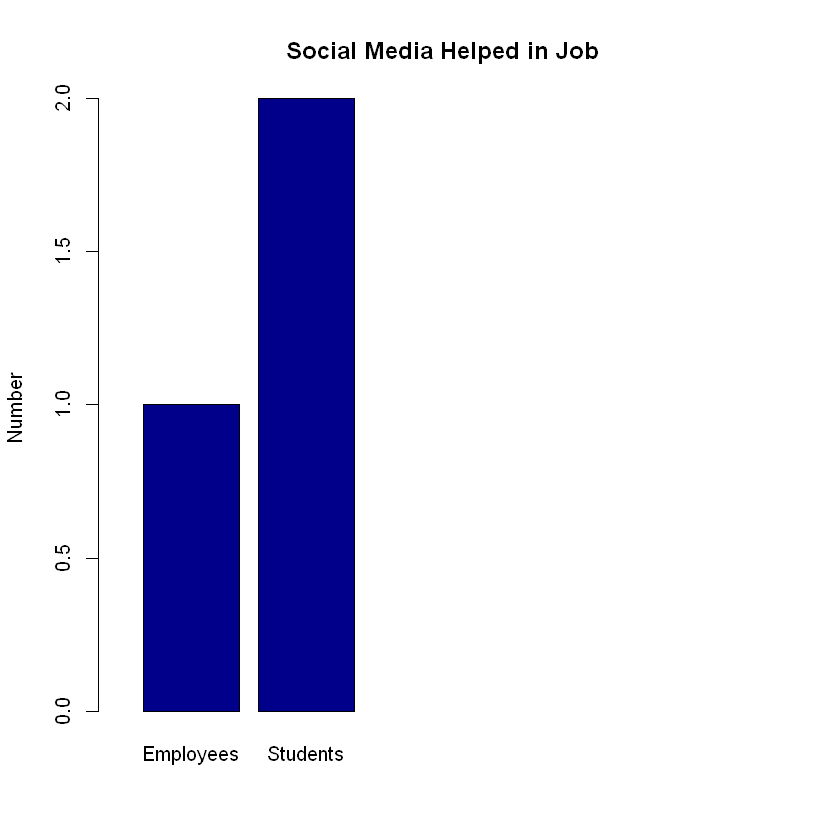

In [204]:
barplot(socialimpact$emplnw,names.arg=c('Employees', 'Students'),ylab = "Number",col = "darkblue",
main = "Social Media Helped in Job" , width=15, xlim=c(0,100))